In [1]:
using Distributions
using LinearAlgebra
using Plots
default(label="", margin=10Plots.pt)

In [2]:
include("util.jl")

UT (generic function with 1 method)

In [6]:
function ambiguity(Σ,C, S_k)
    "E_q(z_t | u_t)[H[q(y_t | z_t)]]"
    return 0.5(log(2π) + log(Σ-C'*inv(S_k)*C) - 1)
end

ambiguity (generic function with 1 method)

In [11]:
# Nonlinear observation
g(z) = sin([1.0, 0.0]'*z)

g (generic function with 1 method)

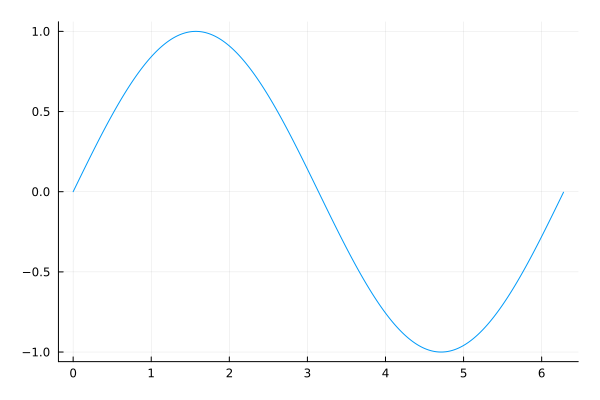

In [34]:
z_ = range(0, stop=2π, step=0.01)
plot(z_, x -> g([x, 0.0]))

In [35]:
# Current state
m_k = [0.0, 1.0]
S_k = diagm(ones(2));

In [36]:
# Measurement noise
R = 1e-3

0.001

In [37]:
# Approximated state
μ_k, Σ_k, C_k = UT(m_k, S_k, g, Q=R)

(0.0, 1.0009993333335112, [0.9999996666667, 0.0])

In [38]:
ambiguity(Σ_k, C_k, S_k)

-3.0349391062863953

In [39]:
z_ = range(0, stop=2π, step=0.01)
A_ = zeros(length(z_))
for i in 1:length(z_)
    μ_k, Σ_k, C_k = UT([z_[i], 0.0], S_k, g, Q=R)
    A_[i] = ambiguity(Σ_k, C_k, S_k)
end

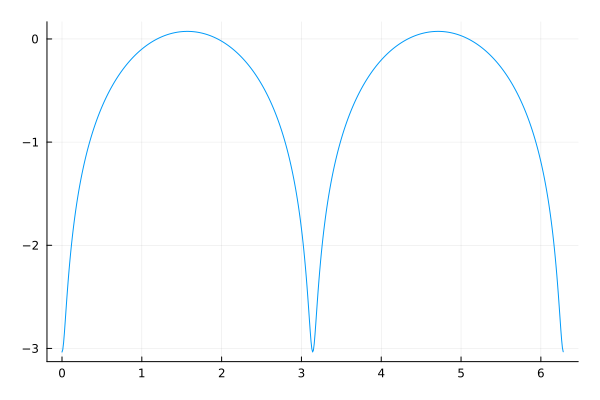

In [40]:
plot(z_, A_)